In [103]:
import numpy as np
import pandas as pd
import matplotlib.cm as cm
import matplotlib.pyplot as plt


In [104]:
data_t = pd.read_csv("/content/sample_data/train.csv")

In [105]:
data_t.head()


,vidid,adview,views,likes,dislikes,comment,published,duration,category
0,VID_18655,40,1031602,8523,363,1095,2016-09-14,PT7M37S,F
1,VID_14135,2,1707,56,2,6,2016-10-01,PT9M30S,D
2,VID_2187,1,2023,25,0,2,2016-07-02,PT2M16S,C
3,VID_23096,6,620860,777,161,153,2016-07-27,PT4M22S,H
4,VID_10175,1,666,1,0,0,2016-06-29,PT31S,D


In [106]:
data_t.shape

(14999, 9)

In [107]:
category = {'A': 1, 'B':2 , 'C':3, 'D':4 , 'E':5 , 'F': 6, 'G':7 , 'H':8 }
data_t["category"]= data_t["category"].map(category)
data_t.head()

,vidid,adview,views,likes,dislikes,comment,published,duration,category
0,VID_18655,40,1031602,8523,363,1095,2016-09-14,PT7M37S,6
1,VID_14135,2,1707,56,2,6,2016-10-01,PT9M30S,4
2,VID_2187,1,2023,25,0,2,2016-07-02,PT2M16S,3
3,VID_23096,6,620860,777,161,153,2016-07-27,PT4M22S,8
4,VID_10175,1,666,1,0,0,2016-06-29,PT31S,4


In [108]:
data_t = data_t[data_t.views !='F']
data_t = data_t[data_t.likes !='F']
data_t = data_t[data_t.dislikes !='F']
data_t = data_t[data_t.comment !='F']

In [109]:
data_t["views"] = pd.to_numeric(data_t["views"])
data_t["likes"] = pd.to_numeric(data_t["likes"])
data_t["dislikes"] = pd.to_numeric(data_t["dislikes"])
data_t["comment"] = pd.to_numeric(data_t["comment"])
data_t["adview"] = pd.to_numeric(data_t["adview"])

In [110]:
col_vid = data_t["vidid"]

In [111]:
from sklearn.preprocessing import LabelEncoder
data_t["duration"] = LabelEncoder().fit_transform(data_t["duration"])
data_t["vidid"] = LabelEncoder().fit_transform(data_t["vidid"])
data_t["published"] = LabelEncoder().fit_transform(data_t["published"])

In [112]:
data_t.head()

,vidid,adview,views,likes,dislikes,comment,published,duration,category
0,5912,40,1031602,8523,363,1095,2168,2925,6
1,2741,2,1707,56,2,6,2185,3040,4
2,8138,1,2023,25,0,2,2094,1863,3
3,9005,6,620860,777,161,153,2119,2546,8
4,122,1,666,1,0,0,2091,1963,4


In [113]:
import datetime
import time

In [114]:
def checki(x):
  y = x[2:]
  h = ''
  m = ''
  s = ''
  mm = ''
  P = ['H','M','S']
  for i in y:
    if i not in P:
      mm+=i
    else:
      if(i=="H"):
        h = mm
        mm = ''
      elif(i == "M"):
        m = mm
        mm = ''
      else:
        s = mm
        mm = ''
    if(h==''):
      h = '00'
    if(m == ''):
      m = '00'
    if(s==''):
      s='00'
  bp = h+':'+m+':'+s
  return bp
train=pd.read_csv("/content/sample_data/train.csv")
mp = pd.read_csv("/content/sample_data/train.csv")["duration"]
time = mp.apply(checki)

In [115]:
def func_sec(time_string):
  h, m, s = time_string.split(':')
  return int(h) * 3600 + int(m) * 60 + int(s)
  

In [116]:
time1 = time.apply(func_sec)

In [117]:
data_t["duration"] = time1
data_t.head()

,vidid,adview,views,likes,dislikes,comment,published,duration,category
0,5912,40,1031602,8523,363,1095,2168,457,6
1,2741,2,1707,56,2,6,2185,570,4
2,8138,1,2023,25,0,2,2094,136,3
3,9005,6,620860,777,161,153,2119,262,8
4,122,1,666,1,0,0,2091,31,4


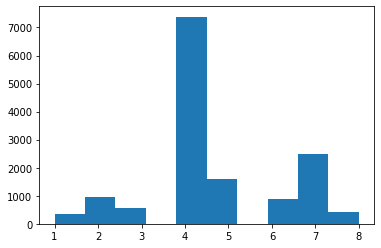

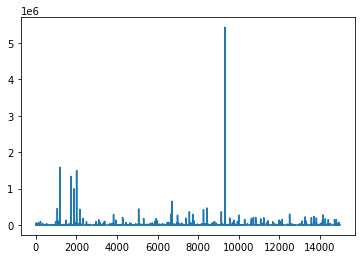

In [118]:
plt.hist(data_t["category"])
plt.show()
plt.plot(data_t["adview"])
plt.show()

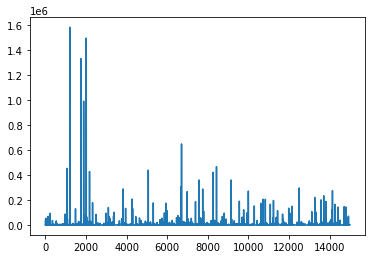

In [119]:
data_t = data_t[data_t["adview"]<2000000]
plt.plot(data_t["adview"])
plt.show()

In [120]:
import seaborn as sns

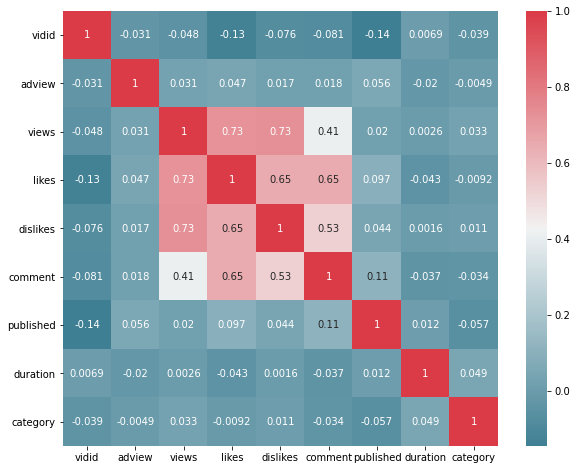

In [121]:
f, ax = plt.subplots(figsize=(10,8))
corr = data_t.corr()
sns.heatmap(corr, mask = np.zeros_like(corr, dtype=np.bool), cmap=sns.diverging_palette(220 , 10, as_cmap =True),square=True,ax=ax, annot=True)

In [122]:
from sklearn.model_selection import train_test_split 

In [123]:
Y_train = pd.DataFrame(data=data_t.iloc[:, 1].values , columns=['target'])
data_t = data_t.drop(["adview"], axis =1)
data_t = data_t.drop(["vidid"], axis =1)

In [124]:
X_train , X_test, y_train , y_test = train_test_split(data_t  ,Y_train , test_size=0.15 ,random_state=42 )
X_train.shape

(12440, 7)

In [125]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X_train= scaler.fit_transform(X_train)
X_test= scaler.fit_transform(X_test)

In [134]:
from sklearn import metrics
def print_error(X_test , y_test , model_name):
  prediction = model_name.predict(X_test)
  print('Mean Absolute Error:',metrics.mean_absolute_error(y_test, prediction))
  print('Mean Squared Error:', metrics.mean_squared_error(y_test, prediction))
  print('RMS error: ', np.sqrt(metrics.mean_squared_error(y_test, prediction)))


In [131]:
from sklearn import linear_model
linear_regression = linear_model.LinearRegression()
linear_regression.fit(X_train,y_train)
print_error(X_test,y_test,linear_regression)

Mean Absolute Error: 3841.560141942038
Mean Squared Error: 1013034743.4769675
RMS error:  31828.206727319204


In [132]:
from sklearn.tree import DecisionTreeRegressor
decision_tree_reg = DecisionTreeRegressor()
decision_tree_reg.fit(X_train,y_train)
print_error(X_test,y_test,decision_tree_reg)

Mean Absolute Error: 3303.225865209472
Mean Squared Error: 2187840885.564663
RMS error:  46774.361412687


In [139]:
from sklearn.ensemble import RandomForestRegressor
n_estimators = 200
max_d=25
min_sample_split = 15
min_sample_leaf = 2
random_forest_reg = RandomForestRegressor(n_estimators = n_estimators, max_depth= max_d, min_samples_split=min_sample_split )
random_forest_reg.fit(X_train,y_train)
print_error(X_test,y_test, random_forest_reg)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:7: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  import sys


Mean Absolute Error: 3320.7288354826555
Mean Squared Error: 677138951.8120875
RMS error:  26021.893701498506


In [140]:
from sklearn.svm import SVR
support_vec_reg = SVR()
support_vec_reg.fit(X_train,y_train)
print_error(X_test,y_test, linear_regression)

/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Mean Absolute Error: 3841.560141942038
Mean Squared Error: 1013034743.4769675
RMS error:  31828.206727319204


In [141]:
import keras
from keras.layers import Dense

ann = keras.models.Sequential([
                               Dense(12, activation="relu",input_shape=X_train.shape[1:]),
                               Dense(12, activation="relu"),Dense(1)
                              ])
optimizer=keras.optimizers.Adam()
loss=keras.losses.mean_squared_error
ann.compile(optimizer=optimizer,loss=loss,metrics=["mean_squared_error"])

In [142]:
history=ann.fit(X_train,y_train,epochs=100)
ann.summary()
print_error(X_test,y_test,ann)

Epoch 1/100
389/389 [==============================] - 0s 977us/step - loss: 739686912.0000 - mean_squared_error: 739686912.0000
Epoch 2/100
389/389 [==============================] - 0s 1ms/step - loss: 739659840.0000 - mean_squared_error: 739659840.0000
Epoch 3/100
389/389 [==============================] - 0s 988us/step - loss: 739594880.0000 - mean_squared_error: 739594880.0000
Epoch 4/100
389/389 [==============================] - 0s 1000us/step - loss: 739479872.0000 - mean_squared_error: 739479872.0000
Epoch 5/100
389/389 [==============================] - 0s 1ms/step - loss: 739311936.0000 - mean_squared_error: 739311936.0000
Epoch 6/100
389/389 [==============================] - 0s 987us/step - loss: 739101440.0000 - mean_squared_error: 739101440.0000
Epoch 7/100
389/389 [==============================] - 0s 969us/step - loss: 738864640.0000 - mean_squared_error: 738864640.0000
Epoch 8/100
389/389 [==============================] - 0s 1ms/step - loss: 738600192.0000 - mean_squ

In [143]:
import joblib
joblib.dump(decision_tree_reg, "decision_tree_youtube_adview.pkl")

['decision_tree_youtube_adview.pkl']

In [144]:
ann.save("ann_youtube_adview.h5")